# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Pedro Fonseca </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from numpy import arange
from scipy.stats import expon
import scipy.stats as stats

In [18]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [19]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [20]:
df.loc[(df.Latitude<=0),"Hemisfério"]="Sul"
df.loc[(df.Latitude>0),"Hemisfério"]="Norte"
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

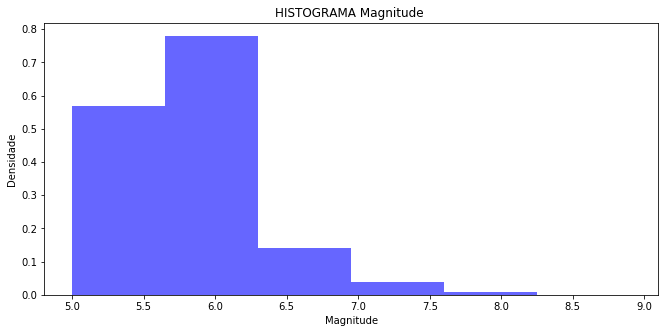

In [21]:
fig = plt.figure(figsize=(11, 5))
faixa = arange(5,9,0.65)
plot= df.Magnitude.plot.hist(bins = faixa, title='HISTOGRAMA Magnitude ', normed=1, alpha=0.6,color = 'b')
plt.ylabel('Densidade')
plt.xlabel("Magnitude")
plt.show()

## Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

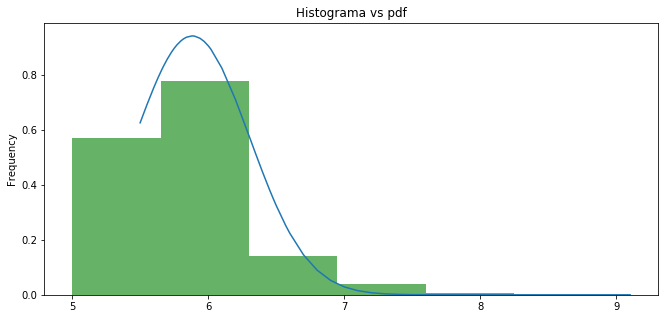

In [22]:
mu = df.Magnitude.mean()
dp = df.Magnitude.std()
fig = plt.figure(figsize=(11, 5))
plot= df.Magnitude.plot.hist(bins = faixa, title='HISTOGRAMA Magnitude ', normed=1, alpha=0.6,color = 'g')
a = sorted(df.Magnitude)
plt.plot(a, stats.norm.pdf(a, loc = mu, scale = dp))
plt.title('Histograma vs pdf')
plt.show()

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [23]:
ct = pd.crosstab(df.Hemisfério, df.Type, margins=True, rownames=['Hemisfério'], colnames=['Type'], normalize=True)
ct

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisfério,,,,,
Norte,0.447121,0.000085,0.006279,0.000000,0.453485
Sul,0.545191,0.000085,0.001196,0.000043,0.546515
All,0.992312,0.000171,0.007475,0.000043,1.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [24]:
p=100*ct.Earthquake.Norte/(ct.Earthquake.Norte+ct.Earthquake.Sul)
p

45.058539944903586

Explique o seu raciocínio

Eu peguei a probabilidade de entre os eventos considerados, ocorrer um terremoto no hemisfério Norte. E dividi esse valor pela probabilidade de ocorrer um evento, o evento ser um terremoto (em qualquer hemisfério).

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [25]:
t=100*ct["Nuclear Explosion"].Norte/(ct['Earthquake'].Norte+ct['Explosion'].Norte+ct['Nuclear Explosion'].Norte+ct['Rock Burst'].Norte)
t

1.3845719129697656

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

É simplismente dividir a probabilidade de ter um nuclear explosion no norte pelo All ( que é  a probabilidade de ocorrer um veneto no Norte).

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

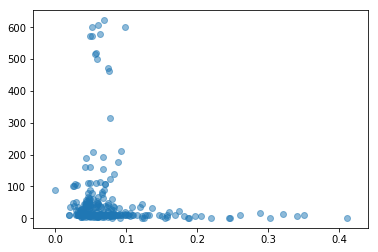

In [26]:
scatter_plot = plt.scatter(df['Magnitude Error'], df['Depth'], alpha=0.5)
plt.show()

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [27]:
df["Depth"].corr(df["Magnitude Error"])

-0.076918438923387192

Explique o que significa o valor da correlação calculada acima? 

O valor da correlaçãpo entre duas variáveis representa o quanto elas estão associadas uma a outra, no caso o número é muito próximo de 0 e por isso a correlação entre Depth e Magnitude Error é baixa

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64
count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64


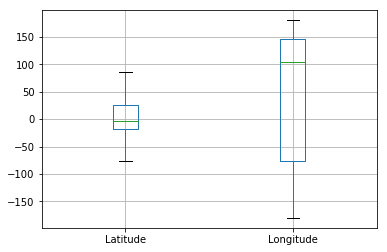

In [28]:
print(df.Latitude.describe())
print(df.Longitude.describe())
df.boxplot(column=["Latitude","Longitude"])

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [29]:
df.loc[(df.Type=="Nuclear Explosion")&(df["Magnitude Type"]=="MB")&(df["Hemisfério"]=="Sul"),"Hemis"]="Sul"
df.loc[(df.Type=="Nuclear Explosion")&(df["Magnitude Type"]=="MB")&(df["Hemisfério"]=="Norte"),"Hemis"]="Norte"
sul=df["Hemis"].value_counts("Sul")
sul

Norte    0.828221
Sul      0.171779
Name: Hemis, dtype: float64